<a href="https://colab.research.google.com/github/nassim1014/Pytorch-DeepLearning-Tuto/blob/main/Pytorch_DeepLearning_Tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

Simple CNN model

In [ ]:
''' import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)  # Adjust based on the actual spatial dimensions

        self.fc2 = nn.Linear(256, 10)  # 10 output classes for example, change as needed

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # Print the size before fc1
        print(x.size())

        x = x.view(x.size(0), -1)
        print(x.size())  # Print the size before fc1

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



# Download and prepare the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Initialize the CNN model
net = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the CNN
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
 '''

" import torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport torchvision\nimport torchvision.transforms as transforms\n\n# Define the CNN architecture\nclass SimpleCNN(nn.Module):\n    def __init__(self):\n        super(SimpleCNN, self).__init__()\n        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)\n        self.relu = nn.ReLU()\n        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)\n        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)\n        self.fc1 = nn.Linear(32 * 8 * 8, 256)  # Adjust based on the actual spatial dimensions\n\n        self.fc2 = nn.Linear(256, 10)  # 10 output classes for example, change as needed\n\n    def forward(self, x):\n        x = self.conv1(x)\n        x = self.relu(x)\n        x = self.maxpool(x)\n        x = self.conv2(x)\n        x = self.relu(x)\n        x = self.maxpool(x)\n\n        # Print the size before fc1\n        print(x.size())\n\n        x = x.view(x.size(0), -1)\n        pri

what is a tensor : it s just like a list or a numpy array , when u do ML , u can use numpy array , when u use deep learning u use tensors . the diff is that they work better on GPU's (vs Regular CPU's)

In [ ]:
import numpy as np

**Python Lists**

In [ ]:
my_list = [[1,2,3,4],[7,8,5,1],[2,3,4,5]]
my_list

[[1, 2, 3, 4], [7, 8, 5, 1], [2, 3, 4, 5]]

**Numpy Array**

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.89707354, 0.91073968, 0.6323467 , 0.88190936],
       [0.36000356, 0.59439951, 0.64443502, 0.77695361],
       [0.25249834, 0.46749829, 0.03759122, 0.28283357]])

**TENSORS**

In [ ]:
tensor_2d= torch.randn(3,4)
tensor_2d

tensor([[-0.7391,  0.3914, -0.7005,  1.3507],
        [-1.1057, -0.7238,  2.0282,  1.0920],
        [-0.7122, -2.0843,  1.6207,  0.1632]])

create tensor out of numpy array

In [ ]:
torch.tensor(np1)

tensor([[0.8971, 0.9107, 0.6323, 0.8819],
        [0.3600, 0.5944, 0.6444, 0.7770],
        [0.2525, 0.4675, 0.0376, 0.2828]], dtype=torch.float64)

In [ ]:
torch.zeros(3,4,2)

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

**Create Basic Neural Net with Pytorch**

In [ ]:
# Using the Iris Data set containing Irs Flowers - The goal classify the flowers
# this model will just take an input move it to the hidden layers and to the output and that s it no complicated stuff
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
#Create a Model Class that inherits nn.Module. NB : u can use functionnal programming to get things done quickely but here we re using Object oriented Programming

class Model(nn.Module):
    # input Layer (4 features of the flower)
    #   --> Hidden layer1 (number of neuronnes)
    #        --> Hideen Layer2
    #               --> output (3 classes of iris flower)
    def __init__(self, in_features =4 ,h1 = 8, h2 =9 ,out_feature=3) :
        super().__init__()
        # we have 4 features describing the flowers
        # we want first hidden layer with 8 neuronnes and a second hidden layer with 9
        # out_feature = 3 bc we have 3 classes
        self.fc1 = nn.Linear(in_features, h1) # from input layer to h1
        # fc := fully connected
        self.fc2 = nn.Linear(h1, h2)  # from h1 to h2
        self.out = nn.Linear(h2, out_feature) # from h2 to output
    #create a funciton that moves things forward from layer to another
    def forward(self , x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x= self.out(x)

        return x




In [ ]:
torch.manual_seed(41)
# Create an instance of our model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [ ]:
my_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

In [ ]:
my_df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]

In [ ]:
# train test split
X = my_df.drop('species',axis=1).values
y = my_df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criterion of model to measure the error of how far off the predictions are
criterion = nn.CrossEntropyLoss()
#Choose an optimizer , in order to learn ,and learning rate lr (if error doesn't go down after a bunch of iterations (epochs), lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
# model.parametres are fc1 , fc2 and output


In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#train model
# Epoch : one run thru the all the training data in our network
epochs = 100
losses = [] #see the evvolution of loss

for i in range((epochs)):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  #measure loss
  loss = criterion(y_pred, y_train)
  losses.append(loss) #.detach().numpy)

  #print every 10 epoch
  if i%10 ==0:
    print(f'Epoch {i} and loss {loss}')

  # Do some Backpropagation to fine-tune the weights
  optimizer.zero_grad()   # Zero the gradients to prevent accumulation
  loss.backward()        # Perform backpropagation to compute gradients
  optimizer.step()        # Update the weights using the computed gradients





Epoch 0 and loss 1.1251550912857056
Epoch 10 and loss 1.0096259117126465
Epoch 20 and loss 0.8157405853271484
Epoch 30 and loss 0.585706353187561
Epoch 40 and loss 0.3999636471271515
Epoch 50 and loss 0.26768800616264343
Epoch 60 and loss 0.17942361533641815
Epoch 70 and loss 0.12151690572500229
Epoch 80 and loss 0.0860118493437767
Epoch 90 and loss 0.06520850956439972


1. **`optimizer.zero_grad()`:** This line is used to zero out the gradients of the parameters before the backward pass. Gradients represent the slope of the loss function with respect to the model parameters. In PyTorch, gradients are accumulated by default on subsequent backward passes, so it's essential to zero them before computing gradients in the current iteration. This prevents the gradients from being accumulated across multiple iterations.

2. **`loss.backward()`:** This line performs backpropagation through the computational graph to compute gradients of the loss with respect to the model parameters. Backpropagation is a process used to calculate the gradient of the loss function with respect to each parameter in the neural network. It uses the chain rule of calculus to propagate the error backward through the network.

3. **`optimizer.step()`:** This line updates the model parameters (weights and biases) using the gradients computed in the backward pass. The optimizer is an optimization algorithm (e.g., stochastic gradient descent, Adam, etc.) responsible for updating the model parameters to minimize the loss. The `step()` function applies the computed gradients to the parameters, adjusting them in the direction that reduces the loss.


In [ ]:
[i.item() for i in losses]

[1.1251550912857056,
 1.1095242500305176,
 1.0960756540298462,
 1.0845398902893066,
 1.073915719985962,
 1.0637413263320923,
 1.0538722276687622,
 1.0440350770950317,
 1.0337213277816772,
 1.0227365493774414,
 1.0096259117126465,
 0.9954349398612976,
 0.9828447103500366,
 0.9664683938026428,
 0.9485272169113159,
 0.9305612444877625,
 0.9112032651901245,
 0.8891754150390625,
 0.8652693629264832,
 0.8407701253890991,
 0.8157405853271484,
 0.7899296283721924,
 0.7633073925971985,
 0.7376409769058228,
 0.7132112383842468,
 0.6902050375938416,
 0.6690837740898132,
 0.6484997272491455,
 0.627752423286438,
 0.6065686345100403,
 0.585706353187561,
 0.5654083490371704,
 0.5454426407814026,
 0.5255759954452515,
 0.5060237050056458,
 0.48700016736984253,
 0.4685356318950653,
 0.4503938555717468,
 0.4329933822154999,
 0.4162401556968689,
 0.3999636471271515,
 0.38433876633644104,
 0.36935704946517944,
 0.3548978567123413,
 0.34101882576942444,
 0.32765448093414307,
 0.3147183954715729,
 0.30236876

In [ ]:
range(epochs)

range(0, 100)

Text(0.5, 0, 'Epoch')

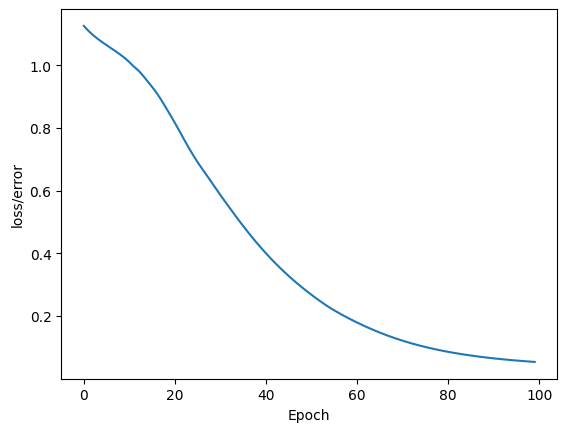

In [ ]:
plt.plot(range(epochs), [i.item() for i in losses])
plt.ylabel("loss/error")
plt.xlabel("Epoch")

**Evaluate model on test set**

In [ ]:
with torch.no_grad() : #turn off back propagation
  y_eval = model.forward(X_test) # get prediction on test set
  loss = criterion(y_eval, y_test)

loss



tensor(0.1315)

not looking good , we have a test error of 0.1315 and a training error of 0.06520850956439972. we need to correct the model

In [ ]:
correct = 0
with torch.no_grad() :
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #will tell the type of flower the model think it is vs the actual one
    print(f'{i+1} ) {str(y_val)} \t {y_test[i]}')
    # we have the highest number corresponds to the flower ( 0, 1 or 2)

    # correct or not
    if y_val.argmax().item() == y_test[i] :
      correct+=1

print(f'We got {correct} correct out of {len(y_test)} instance')

1 ) tensor([-5.8760,  4.4628,  6.5124]) 	 2
2 ) tensor([-7.5436,  4.1670,  9.7255]) 	 2
3 ) tensor([-8.4504,  5.1271, 10.1987]) 	 2
4 ) tensor([-4.3398,  5.6267,  2.5608]) 	 1
5 ) tensor([-7.1825,  4.8754,  8.2992]) 	 2
6 ) tensor([-3.3974,  5.3463,  1.2803]) 	 1
7 ) tensor([-5.9231,  4.9822,  5.9997]) 	 2
8 ) tensor([-4.2881,  5.7003,  2.3889]) 	 1
9 ) tensor([-6.5356,  4.9257,  7.1260]) 	 2
10 ) tensor([-8.0509,  4.4129, 10.3286]) 	 2
11 ) tensor([-5.6762,  4.9500,  5.6215]) 	 2
12 ) tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13 ) tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14 ) tensor([-2.1108,  4.0515,  0.5799]) 	 1
15 ) tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16 ) tensor([-5.4724,  5.1165,  5.0934]) 	 2
17 ) tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18 ) tensor([-5.8075,  4.6053,  6.2458]) 	 1
19 ) tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20 ) tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21 ) tensor([-2.6189,  4.5619,  0.8574]) 	 1
22 ) tensor([-7.7412,  4.7377,  9.4199]) 	 2
23 ) tensor([ 3.574

if we change the random state we can have different results , maybe better . 28 out of 30 is not that bad after all .

**ADDING NEW DATA** $ $

... A new flower for example


In [ ]:
new_iris = torch.tensor([4.7, 3.2 , 1.3 , 0.2])

In [ ]:
with torch.no_grad() :
  print(model.forward(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


**Save and load model**

In [ ]:
torch.save(model.state_dict(),"my_iris_model.pt")

load the saved model

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

**CNN**